### 4. Write a program to find ‘most frequent’ 9-mers in Vibrio Cholerae genome (Chr1: NC_002505.1, Chr2: NC_002506.1): (i) exact match, (ii) allowing ‘d’ mismatches. [Hint: count for reverse complements also).	Are the ‘most frequent’ 9-mers the same in Salmonella enterica (NC_003198.1) as identified in Vibrio Cholerae genome? Plot the GC skew and find which ‘most frequent’ 9-mer is in the vicinity of the region where GC skew changes sign.

In [41]:
import collections
import itertools
import math
import numpy as np
import heapq
def count_kmers(seq, k = 9):
    counts = collections.defaultdict(lambda: 0)
    num_kmers = len(seq) - k + 1
    for i in range(num_kmers):
        kmer = seq[i:i+k]
        if kmer not in counts:
            counts[kmer] = 0
        counts[kmer] += 1
    return counts

def reverse_complement(seq):
    return seq.replace('A', 't').replace('T', 'a').replace('G', 'c').replace('C', 'g').upper()[::-1]

def merge(dict1, dict2):
    for item in dict1:
        if item in dict2:
            dict1[item] += dict2[item]
#             print(dict1[item])
        else:
            pass
    return dict1

with open('NC_002505.1.txt', 'r') as file:
    vc1 = file.read().replace('\n', '')
dict_1 = count_kmers(vc1)
with open('NC_002506.1.txt', 'r') as file:
    vc2 = file.read().replace('\n', '')
dict_2 = count_kmers(vc1)
with open('NC_003198.1.txt', 'r') as file:
    se = file.read().replace('\n', '')
dict_3 = count_kmers(se)

dict_12 = count_kmers(vc1 + vc2)
dict_12_rev = count_kmers(reverse_complement(vc1) + reverse_complement(vc2))
answer = merge(dict_12, dict_12_rev)
answer = dict(sorted(answer.items(), key=lambda item: item[1]))
answer = dict(collections.OrderedDict(reversed(list(answer.items()))))
answer = dict(itertools.islice(answer.items(), 50))
y = merge(count_kmers(data), count_kmers(reverse_complement(data)))
print("Most frequent 9-mers in Vibrio Cholerae genome (Chr1: NC_002505.1, Chr2: NC_002506.1):")
# print(heapq.nlargest(10, answer))
answer = dict(itertools.islice(answer.items(), 10))
print(answer)
print("\nMost frequent 9-mers in Vibrio Cholerae genome where GC Skew sign changes:")
# print(heapq.nlargest(10, y))
y = dict(sorted(y.items(), key=lambda item: item[1]))
y = dict(collections.OrderedDict(reversed(list(y.items()))))
y = dict(itertools.islice(y.items(), 10))
print(y)
print("\nMost frequent 9-mers in Salmonella enterica:")
z = merge(count_kmers(se), count_kmers(reverse_complement(se)))
z = dict(sorted(z.items(), key=lambda item: item[1]))
z = dict(collections.OrderedDict(reversed(list(z.items()))))
z = dict(itertools.islice(z.items(), 10))
print(z)
print("\nNo, the most frequent 9-mers aren't the same in Vibrio Cholerae and Salmonella enterica.")

Most frequent 9-mers in Vibrio Cholerae genome (Chr1: NC_002505.1, Chr2: NC_002506.1):
{'TTTGAGTTT': 272, 'AAACTCAAA': 272, 'AAAAAAGCC': 254, 'GGCTTTTTT': 254, 'CAATCGCTT': 253, 'AAGCGATTG': 253, 'AAAGCCAAA': 246, 'TTTGGCTTT': 246, 'TTGAGCAAG': 244, 'CTTGCTCAA': 244}

Most frequent 9-mers in Vibrio Cholerae genome where GC Skew sign changes:
{'GGCTTTTTT': 13, 'AAAAAAGCC': 13, 'TGATTTTGC': 12, 'GCAAAATCA': 12, 'TTGTTTTTG': 12, 'CAAAAACAA': 12, 'TCACCACCA': 11, 'TGGTGGTGA': 11, 'CATTATTGA': 10, 'TTTGCTCTT': 10}
Most frequent 9-mers in Salmonella enterica:
{'CGCCAGCGC': 955, 'GCGCTGGCG': 955, 'GCGCCAGCG': 749, 'CGCTGGCGC': 749, 'CCGCCAGCG': 733, 'CGCTGGCGG': 733, 'CTGGCGCTG': 698, 'CAGCGCCAG': 698, 'GCGGCGGCG': 659, 'CGCCGCCGC': 659}

No, the most frequent 9-mers aren't the same in Vibrio Cholerae and Salmonella enterica.


GC Skew of Vibrio Cholerae:


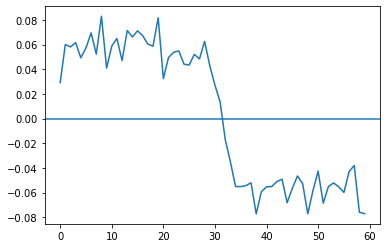

In [42]:
n = math.ceil(len(vc1) / 50000)
a = np.zeros(n)
sets_of_50k = [[] for x in range(n)]
for i in range(len(vc1)):
    index = math.floor(i / 50000)
    sets_of_50k[index].append(vc1[i])

i = 0
for sample in sets_of_50k:
    G = sample.count('G')
    C = sample.count('C')
    a[i] = (G - C) / (G + C)
    i = i + 1
import matplotlib.pyplot as plt
plt.plot(a)
plt.axhline(y = 0)
sliced_start = 0
sliced_end = 0
for i in range(len(a) - 1):
    first = a[i] / abs(a[i])
    second = a[i + 1] / abs(a[i + 1])
    if (first != second):
        sliced_start = i * 50000 - 50000
        sliced_end = i * 50000 + 50000
        break
data = vc1[sliced_start:sliced_end]
print("GC Skew of Vibrio Cholerae:")
dict_5 = count_kmers(data)